In [ ]:

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [ ]:

df = pd.read_csv("/content/stock_market_data-DAL.csv")
# Display the DataFrame
print(df.head())


         Date    Low   High  Close   Open
0  03-05-2007  20.55  21.95  20.72  21.75
1  04-05-2007  20.70  21.35  20.98  21.05
2  07-05-2007  20.20  21.29  20.36  21.20
3  08-05-2007  19.30  20.00  19.63  20.00
4  09-05-2007  19.63  20.20  19.79  19.75


In [ ]:
features = ['Open', 'High', 'Low']
target = 'Close'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df[features]
y=df[target]
dates = df['Date']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=False
)

In [ ]:
lm = LinearRegression()
lm.fit(x_train, y_train)


LinearRegression()

In [ ]:
print(x_train.shape,x_test.shape)

(3568, 3) (893, 3)


In [ ]:
train_score = lm.score(x_train, y_train)
print("Training Score (R²):", train_score)


Training Score (R²): 0.9997390846606207


In [ ]:
x_test

,Open,High,Low
3568,44.31,44.540,43.0000
3569,42.95,43.470,41.9450
3570,41.72,42.800,41.1204
3571,42.47,43.200,42.3000
3572,42.37,43.380,42.0300
...,...,...,...
4456,65.44,66.430,64.8400
4457,66.70,67.000,65.6400
4458,66.76,68.510,66.7600
4459,69.77,69.980,67.2000


In [ ]:
predictions = lm.predict(x_test)

In [ ]:
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
# Calculate RMSE by taking the square root of MSE
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
print("R² Score (Test):", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

R² Score (Test): 0.9980256573193874
Mean Squared Error: 0.1249058984416463
Root Mean Squared Error: 0.3534202858377633
Mean Absolute Error: 0.2783061265539725


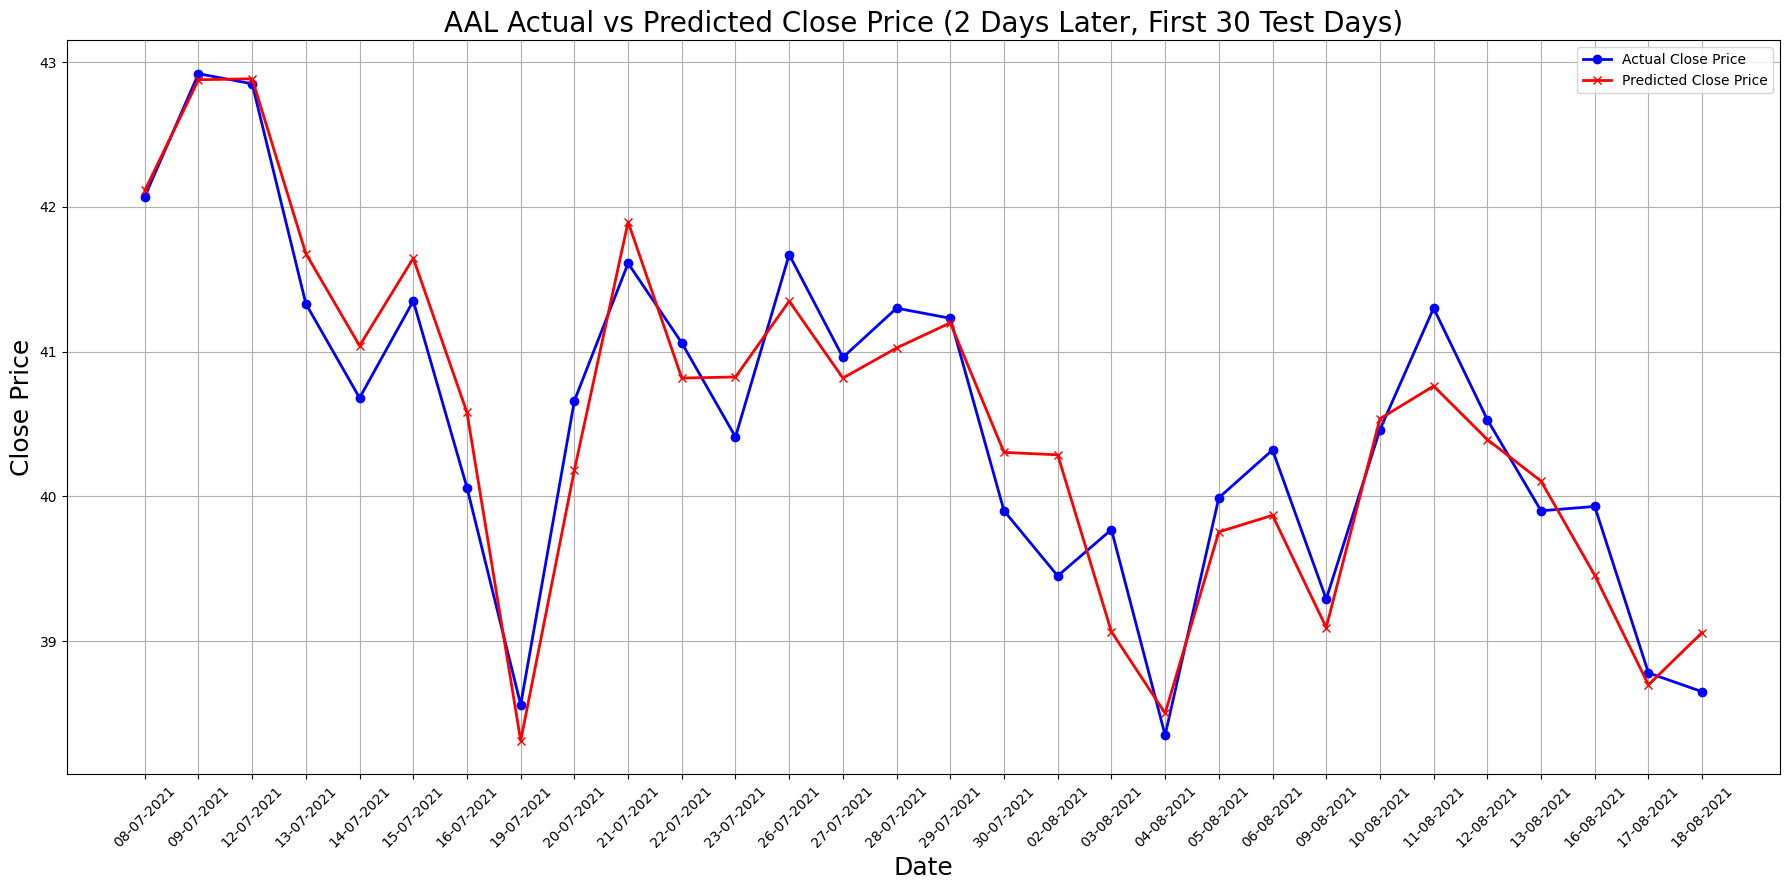

In [ ]:
import matplotlib.pyplot as plt

# Define the number of days
num_days = 30

# Get the indices of the test set to match with the dates
test_indices = x_test.index
actual_dates = df.loc[test_indices, 'Date']  # Extract dates matching test indices

# Adjust the data to start 2 days later
adjusted_y_test = y_test[2:num_days + 2].values  # Start from the 3rd entry (2 days later)
adjusted_predictions = predictions[2:num_days + 2]  # Predictions starting 2 days later
adjusted_dates = actual_dates[2:num_days + 2]  # Dates starting 2 days later

# Plot the data
plt.figure(figsize=(18, 9))

# Actual close prices
plt.plot(adjusted_dates, adjusted_y_test, label='Actual Close Price', color='blue', marker='o', linewidth=2, markersize=6)

# Predicted close prices
plt.plot(adjusted_dates, adjusted_predictions, label='Predicted Close Price', color='red', marker='x', linewidth=2, markersize=6)

# Formatting
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.title(f'AAL Actual vs Predicted Close Price (2 Days Later, First {num_days} Test Days)', fontsize=20)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("linear_reg_dal.png", dpi=300)  # Optional: Save the plot
plt.show()


In [ ]:
df

,Date,Low,High,Close,Open
0,03-05-2007,20.550,21.950,20.72,21.75
1,04-05-2007,20.700,21.350,20.98,21.05
2,07-05-2007,20.200,21.290,20.36,21.20
3,08-05-2007,19.300,20.000,19.63,20.00
4,09-05-2007,19.630,20.200,19.79,19.75
...,...,...,...,...,...
4456,16-01-2025,64.840,66.430,66.18,65.44
4457,17-01-2025,65.640,67.000,65.82,66.70
4458,21-01-2025,66.760,68.510,68.34,66.76
4459,22-01-2025,67.200,69.980,67.78,69.77


In [ ]:
'''# Fetch the actual close price for Day 1
day1_actual_close_price = y_test[0][0]  # Accessing the first element of the NumPy array

# To fetch the corresponding date, adjust based on the indexing of the DataFrame (df)
# Assuming y_test aligns with the last 'n' rows in 'df'
day1_date = df['Date'].iloc[-len(y_test)]

print(f"Date: {day1_date}, Actual Close Price of Day 1: {day1_actual_close_price}")'''

'# Fetch the actual close price for Day 1\nday1_actual_close_price = y_test[0][0]  # Accessing the first element of the NumPy array\n\n# To fetch the corresponding date, adjust based on the indexing of the DataFrame (df)\n# Assuming y_test aligns with the last \'n\' rows in \'df\'\nday1_date = df[\'Date\'].iloc[-len(y_test)]\n\nprint(f"Date: {day1_date}, Actual Close Price of Day 1: {day1_actual_close_price}")'